# __Matrix Factorization__

Một cách tiếp cận khác của kĩ thuật __Colaborative Filtering__ là Matrix Factorization (phân rã ma trận).

## __Giới thiệu__

Kỹ thuật __Matrix Factorization__ (MF), hay còn gọi là "phân rã ma trận", là phương pháp chia ma trận ban đầu `Y` thành hai ma trận nhỏ hơn là `X` và `W`, và cố gắng xây dựng ngược lại ma trận `Y` ban đầu từ hai ma trận nhỏ hơn này, nghĩa là $Y = X\cdot W$

Giống như trong kỹ thuật __Content-based Recommendation System__, mỗi item được mô tả bằng một vector `x` được gọi là item profile. Trong phương pháp này, ta cần tìm vector trọng số `w` tương ứng cho mỗi user sao cho _rating_ mà _user_ đánh giá cho _item_ đó xấp xỉ với: 
$$ y \approx x\cdot w$$ 

Theo cách đó, Utility Matrix `Y` sẽ được xấp xỉ như sau:
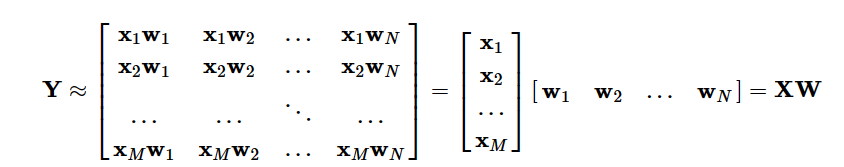

`x` trong bài toán này được xây dựng từ sự mô tả có sẵn của các item, và việc xây dựng hoàn toàn độc lập với quá trình đi tìm vector trọng số `w`. Tuy nhiên cách làm này chưa khai thác hết đặc điểm của những similar users, và việc thực hiện các mô hình riêng lẻ, dẫn đến kết quả đầu ra có thể không tốt.

Bây giờ, vector đặc trưng cho các item `x` sẽ không được xây dựng trước, thay vào đó, vector này sẽ được huấn luyện đồng thời cùng với vector trọng số `w` của user. Điều này dẫn đến biến bài toán này, thành bài toán cần tối ưu cả `X` và `W` thay vì chỉ mỗi `X` như kỹ thuật trên. Trong đó, `X` là ma trận toàn bộ items, với mỗi hàng tương ứng với 1 item, `W` là ma trận toàn bộ users, với mỗi cột tương ứng với một user.

Giống như cách trên, chúng ta cố gắng xấp xỉ ma trận Utility Matrix $Y \in \R^{M\times N}$ bằng tích hai ma trận $X \in \R^{M\times K}$ và $W \in \R^{K\times N}$

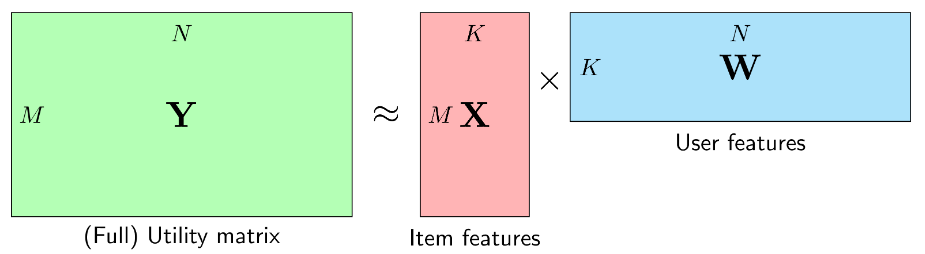


## __Ý tưởng__:

Ý tưởng chính đằng sau Matrix Factorization cho Recommendation Systems là tồn tại các latent features (tính chất ẩn) mô tả sự liên quan giữa các items và users. Ví dụ với hệ thống gợi ý các bộ phim, tính chất ẩn có thể là hình sự, chính trị, hành động, hài, …; cũng có thể là một sự kết hợp nào đó của các thể loại này; hoặc cũng có thể là bất cứ điều gì mà chúng ta không thực sự cần đặt tên. Mỗi item sẽ mang tính chất ẩn ở một mức độ nào đó tương ứng với các hệ số trong vector `x` của nó, hệ số càng cao tương ứng với việc mang tính chất đó càng cao. 

Tương tự, mỗi user cũng sẽ có xu hướng thích những tính chất ẩn nào đó và được mô tả bởi các hệ số trong vector `w` của nó. Hệ số cao tương ứng với việc user thích các bộ phim có tính chất ẩn đó. Giá trị của biểu thức $x\cdot w$ sẽ cao nếu các thành phần tương ứng của `x` và `w` đều cao. Điều này nghĩa là item mang các tính chất ẩn mà user thích, vậy thì nên gợi ý item này cho user đó.

## __Tại sao MF lại được xếp vào Collaborative Filtering ?__
Câu trả lời đến từ việc đi tối ưu hàm mất mát. Về cơ bản, để tìm nghiệm của bài toán tối ưu, ta phải lần lượt đi tìm `X` và `W` khi thành phần còn lại được cố định. Như vậy, mỗi hàng của `X` sẽ phụ thuộc vào toàn bộ các cột của `W`. Ngược lại, mỗi cột của `W` lại phục thuộc vào toàn bộ các hàng của `X`. Như vậy, có những mỗi quan hệ ràng buộc chằng chịt giữa các thành phần của hai ma trận trên. Tức chúng ta cần sử dụng thông tin của tất cả để suy ra tất cả. Vậy nên phương pháp này cũng được xếp vào Collaborative Filtering.

## __Sự khác nhau giữa MF và NBCF__

Trong các bài toán thực tế, số lượng items `M` và số lượng users `N` thường rất lớn. Việc tìm ra các mô hình đơn giản giúp dự đoán ratings cần được thực hiện một cách nhanh nhất có thể. __Neighborhood-based Collaborative Filtering__ không yêu cầu việc learning quá nhiều, nhưng trong quá trình dự đoán (inference), ta cần đi tìm độ similarity của user đang xét với toàn bộ các users còn lại rồi suy ra kết quả. Ngược lại, với Matrix Factorization, việc learning có thể hơi phức tạp một chút vì phải lặp đi lặp lại việc tối ưu một ma trận khi cố định ma trận còn lại, nhưng việc inference đơn giản hơn vì ta chỉ cần lấy tích của hai vector $x\cdot w$, mỗi vector có độ dài K là một số nhỏ hơn nhiều so với M, N. Vậy nên quá trình inference không yêu cầu khả năng tính toán cao. Việc này khiến nó phù hợp với các mô hình có tập dữ liệu lớn.

Thêm nữa, việc lưu trữ hai ma trận `X` và `W` yêu cầu lượng bộ nhớ nhỏ khi so với việc lưu toàn bộ Similarity matrix trong Neighborhood-based Collaborative Filtering. Cụ thể, ta cần bộ nhớ để chứa $K(M+N)$ phần tử thay vì lưu $M^2$ hoặc $N^2$ của Similarity matrix.

## __Xây dựng và tối ưu hàm mất mát__

### __Hàm mất mát__

$$
    \Im( X, W) = \frac{1}{2s} \sum_{n=1}^{N} \sum_{m:r_{mn} = 1} (y_{mn} - x_m\cdot w_n)^2 + \frac{\lambda}{2}(\|X\|_F^2 +\|W\|_F^2)
$$

Trong đó $r_{mn} = 1$ nếu _item_ m được đánh giá bởi _user_ n, $\|\bullet\|_F^2$ là một hàm __Frobineous norm__, tức là căn bậc 2 của tổng bình phương tất cả các phần tử của ma trận, s là toàn bộ số ratings (hay là số lượng rating mà user đánh giá cho item trong dataset).

+ Thành phần thứ nhất của hàm mất mát là trung bình sai số của mô hình.
+ Thành phần thứ hai của hàm mất mát là $l_2$ regularzation, giúp tránh __overfitting__

Việc tối ưu cả X và W cho mô hình tương đối phức tạp. Thay vào đó, phương pháp được sử dụng là lần lượt tối ưu từng ma trận khi cố định ma trận còn lại, cho đến khi ma trận tối ưu hội tụ.

### __Tối ưu hàm mất mát__

Để tối ưu cho mỗi cột của `W` - ma trận user với mỗi cột là một user, ta cố định `X`
$$w_n = w_n - \eta(-\frac{1}{s}\hat{X}^T_n(\hat{y}_n - \hat{X}_n\cdot w_n) + \lambda w_n)$$

Ngược lại, để tối ưu mỗi dòng của `X` - ma trận items với mỗi hàng là một item, ta cố định `W`
$$x_m = x_m - \eta(-\frac{1}{s}(\hat{y}^m - x_m\cdot \hat{W}_m)\hat{W}^T_m + \lambda x_m)$$

với: 
+ $\hat{X}$ là ma trận được tạo bởi các hàng tương ứng với các items đã được rated và $\hat{y}_n$ là rating tương ứng. 
+ $\hat{W}$ là ma trận được tạo bởi các cột tương ứng với các user đã rate cho item và $\hat{y}^m$ là vector rating tương ứng user đó.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

In [2]:
class MatrixFactorizationCF(object):
    def __init__(self, data, K, lam = 0.1, Xinit = None, Winit = None, learning_rate = 0.5, max_iter = 1000, print_every = 100, user_based = 1):
        
        # data: utility matrix
        self.data = data

        # K: number of latent features
        self.K = K

        # lam: regularization parameter
        self.lam = lam

        # learning_rate: alpha
        self.learning_rate = learning_rate

        # max_iter: number of iterations
        self.max_iter = max_iter

        # print_every: print loss every print_every iterations
        self.print_every = print_every

        # user_based: 1 if we are working with user-based CF, 0 if item-based
        self.user_based = user_based

        # number of users and items. Remember to add 1 since id starts from 0
        self.n_users = int(np.max(data[:, 0])) + 1
        self.n_items = int(np.max(data[:, 1])) + 1

        # number of ratings
        self.n_ratings = data.shape[0]

        # Xinit: item matrix initialization with row = number of items, col = latent features
        if Xinit is None:
            self.X = np.random.randn(self.n_items, K)
        else:
            self.X = Xinit

        # Winit: user matrix initialization with col = number of users, row = latent features
        if Winit is None:
            self.W = np.random.randn(K, self.n_users)
        else:
            self.W = Winit

        # copied data
        self.data_n = data.copy()

    def normalize(self):
        # if we are working with user-based CF
        if self.user_based:
            user_col = 0
            item_col = 1
            n_object = self.n_users
        
        # if we are working with item-based CF
        else:
            user_col = 1
            item_col = 0
            n_object = self.n_items

        users = self.data[:, user_col]
        # init mean matrix
        self.mu = np.zeros((n_object,))
        
        for n in range(n_object):
            # get all ratings of user n
            ids = np.where(users == n)[0].astype(int)
            item_ids = self.data[ids, item_col]
            ratings = self.data[ids, 2]

            # calculate mean
            m = np.mean(ratings)
            if np.isnan(m):
                m = 0
            self.mu[n] = m

            # normalize
            self.data_n[ids, 2] = ratings - self.mu[n]

    def loss(self):
        L = 0
        # for each rating in data
        for i in range(self.n_ratings):
            # get user, item, rating
            n, m, _rating = int(self.data_n[i, 0]), int(self.data_n[i, 1]), self.data_n[i, 2]
            # UPDATE LOSS
            xm = self.X[m, :]
            wn = self.W[:, n]
            L += 0.5 * (_rating - xm.dot(wn))**2
        
        L /= self.n_ratings
        # regularization
        L += .5*self.lam*(np.linalg.norm(self.X, 'fro') + np.linalg.norm(self.W, 'fro'))
        return L

    def get_items_rated_by_user(self, user_id):
        # get all items which are rated by user n
        ids = np.where(self.data[:, 0] == user_id)[0]
        item_ids = self.data[ids, 1].astype(int)
        ratings = self.data[ids, 2]
        return (item_ids, ratings)
    
    def get_users_who_rate_item(self, item_id):
        # get all users who rated item m
        ids = np.where(self.data[:, 1] == item_id)[0]
        user_ids = self.data[ids, 0].astype(int)
        ratings = self.data[ids, 2]
        return (user_ids, ratings)
    
    '''
        Update X
            The method optimize item matrix X, given user matrix W
    '''
    def updateX(self):
        # Walk through each item to update
        for m in range(self.n_items):
            # Get all users who rated item m and rating of them
            user_ids, ratings = self.get_users_who_rate_item(m)
            
            # Get Wm matrix related to user_ids
            Wm = self.W[:, user_ids]

            xm = self.X[m, :]
            # Calculate gradient
            grad_xm = -(ratings - xm.dot(Wm)).dot(Wm.T)/self.n_ratings + self.lam*xm
            
            # Update X
            xm -= self.learning_rate*grad_xm.reshape((self.K,))
            self.X[m, :] = xm
    
    def updateW(self):
        # Walk through each user to update
        for n in range(self.n_users):
            # Get all items rated by user n and rating of them
            item_ids, ratings = self.get_items_rated_by_user(n)
            
            # Get Xn matrix related to item_ids
            Xn = self.X[item_ids, :]

            wn = self.W[:, n]
            # Calculate gradient
            grad_wn = -Xn.T.dot(ratings - Xn.dot(wn))/self.n_ratings + self.lam*wn
            
            # Update W
            wn -= self.learning_rate*grad_wn.reshape((self.K,))
            self.W[:, n] = wn

    def predict(self, u, i):
        u = int(u)
        i = int(i)

        # create bias to make rate in range [0, 5]
        if self.user_based:
            bias = self.mu[u]
        else:
            bias = self.mu[i]
        
        # compute the pred rate y_hat = x*w
        pred = self.X[i, :].dot(self.W[:, u]) + bias

        if pred < 0 :
            return 0
        if pred > 5: 
            return 5
        return pred
    
    def predict_for_user(self, user_id):
        # get all items which are rated by user
        ids = np.where(self.data[:, 0] == user_id)[0]
        items_rated_by_u = self.data[ids, 1].tolist()
        
        # predict ratings for items that are not rated by user
        y_pred = self.X.dot(self.W[:, user_id]) + self.mu[user_id]
        predicted_ratings = []

        # return list of (item, rating) of items that are not rated by user
        for i in range(self.n_items):
            if i not in items_rated_by_u:
                predicted_ratings.append((i, y_pred[i]))
        return predicted_ratings

    def RMSE(self, rate_test):
        n_tests = rate_test.shape[0]
        SE = 0 # squared error
        for n in range(n_tests):
            pred = self.predict(rate_test[n, 0], rate_test[n, 1])
            SE += (pred - rate_test[n, 2])**2
        RMSE = np.sqrt(SE/n_tests)
        return RMSE

    def fit(self):
        self.normalize()
        for it in range(self.max_iter):
            self.updateX()
            self.updateW()
            if (it + 1) % self.print_every == 0:
                print('iter =', it + 1, ', loss =', self.loss())

    def score(self):
        pass

In [3]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('data/ml-100k/ub.base', sep='\t', names=r_cols)
ratings_test = pd.read_csv('data/ml-100k/ub.test', sep='\t', names=r_cols)

rate_train = np.array(ratings_base)
rate_test = np.array(ratings_test)

# indices start from 0
rate_train[:, :2] -= 1
rate_test[:, :2] -= 1

In [4]:
%%time
rs = MatrixFactorizationCF(rate_train, K = 10, lam = .1, print_every = 10, learning_rate = 0.75, max_iter = 100, user_based = 1)
rs.fit()
RMSE = rs.RMSE(rate_test)
print('\nUser-based MF, RMSE =', RMSE)

iter = 10 , loss = 5.636032988202985
iter = 20 , loss = 2.6349027117461263
iter = 30 , loss = 1.3414920313132732
iter = 40 , loss = 0.7520359975492713
iter = 50 , loss = 0.4818709708803352
iter = 60 , loss = 0.35797401472211676
iter = 70 , loss = 0.3011509458573267
iter = 80 , loss = 0.27508949825721823
iter = 90 , loss = 0.26313641409954625
iter = 100 , loss = 0.2576540349417697

User-based MF, RMSE = 1.0603799048824094
CPU times: total: 1min 29s
Wall time: 22 s


In [5]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('data/ml-100k/ua.base', sep='\t', names=r_cols)
ratings_test = pd.read_csv('data/ml-100k/ua.test', sep='\t', names=r_cols)

rate_train = np.array(ratings_base)
rate_test = np.array(ratings_test)

# indices start from 0
rate_train[:, :2] -= 1
rate_test[:, :2] -= 1



In [6]:
%%time
rs = MatrixFactorizationCF(rate_train, K = 10, lam = .1, print_every = 10, learning_rate = 0.75, max_iter = 100, user_based = 1)
rs.fit()
RMSE = rs.RMSE(rate_test)
print('\nUser-based MF, RMSE =', RMSE)

iter = 10 , loss = 5.653668577283477
iter = 20 , loss = 2.6432761897097277
iter = 30 , loss = 1.3479547400875465
iter = 40 , loss = 0.7577686215144247
iter = 50 , loss = 0.48728840579442767
iter = 60 , loss = 0.36325236885710116
iter = 70 , loss = 0.3063675765583014
iter = 80 , loss = 0.28027869149251927
iter = 90 , loss = 0.26831341082959637
iter = 100 , loss = 0.2628256146377251

User-based MF, RMSE = 1.0431349641487162
CPU times: total: 1min 16s
Wall time: 23.5 s


In [9]:
rs.predict_for_user(2)

[(0, 2.9090910632595244),
 (1, 2.909091023848288),
 (2, 2.9090906823081366),
 (3, 2.9090906930439346),
 (4, 2.909091251495143),
 (5, 2.909091240588569),
 (6, 2.9090900087261398),
 (7, 2.909091137658947),
 (8, 2.909090771490351),
 (9, 2.909090612475889),
 (10, 2.909091218902571),
 (11, 2.909090866635535),
 (12, 2.9090906410344606),
 (13, 2.9090908461560363),
 (14, 2.909091446122522),
 (15, 2.909090475341773),
 (16, 2.90909031232785),
 (17, 2.909090445265255),
 (18, 2.9090899723360697),
 (19, 2.909091346006254),
 (20, 2.9090906185649996),
 (21, 2.9090914392942566),
 (22, 2.9090915422197052),
 (23, 2.9090907331178926),
 (24, 2.909090265262883),
 (25, 2.9090914146126727),
 (26, 2.909091781953384),
 (27, 2.9090909235259166),
 (28, 2.9090911332936997),
 (29, 2.90909163108834),
 (30, 2.9090913240341547),
 (31, 2.909091595062069),
 (32, 2.9090913674171683),
 (33, 2.9090904580658727),
 (34, 2.9090907982907237),
 (35, 2.9090900404579414),
 (36, 2.909091217420291),
 (37, 2.9090913167470833),
 (38